In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Regression Discontinuity: Banking Recovery**
Firstly, we'll load the data to understand it & analyze it.

In [2]:
data = r'D:\Desktop\Technocolabs Project\bank_data.csv'
data = pd.read_csv(data)

In [4]:
# Top five records
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
# last five records
data.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [6]:
# Shape of dataset (rows & columns)
data.shape

(1882, 6)

In [7]:
# feature names
data.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [8]:
# Description
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [9]:
# Check for null values
data.isnull().any()

id                          False
expected_recovery_amount    False
actual_recovery_amount      False
recovery_strategy           False
age                         False
sex                         False
dtype: bool

In [10]:
# Check for duplicated values
data.duplicated().any()

False

In [11]:
# Data Information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [12]:
# Unique values in each column
data.nunique()

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [13]:
# Unique values in 'recovery strategy' column
strategy_levels = data['recovery_strategy'].unique()
print(strategy_levels)

['Level 0 Recovery' 'Level 1 Recovery' 'Level 2 Recovery'
 'Level 3 Recovery' 'Level 4 Recovery']


In [14]:
# value counts for each level of recovery
data['recovery_strategy'].value_counts()

Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64

# **Graphical exploratory data analysis**
The bank has implemented different recovery strategies at different thresholds ($1000, $2000, $3000 and $5000) where the greater the Expected Recovery Amount, the more effort the bank puts into contacting the customer. Zeroing in on the first transition (between Level 0 and Level 1) means we are focused on the population with Expected Recovery Amounts between $0 and $2000 where the transition between Levels occurred at $1000. We know that the customers in Level 1 (expected recovery amounts between $1001 and $2000) received more attention from the bank and, by definition, they had higher Expected Recovery Amounts than the customers in Level 0 (between $1 and $1000).

**Here's a quick summary of the Levels and thresholds again:**

* Level 0: Expected recovery amounts >$0 and <=$1000
* Level 1: Expected recovery amounts >$1000 and <=$2000
* The threshold of $1000 separates Level 0 from Level 1

A key question is whether there are other factors besides Expected Recovery Amount that also varied systematically across the $1000 threshold. For example, does the customer age show a jump (discontinuity) at the $1000 threshold or does that age vary smoothly? We can examine this by first making a scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, $0 to $2000. This range covers Levels 0 and 1.

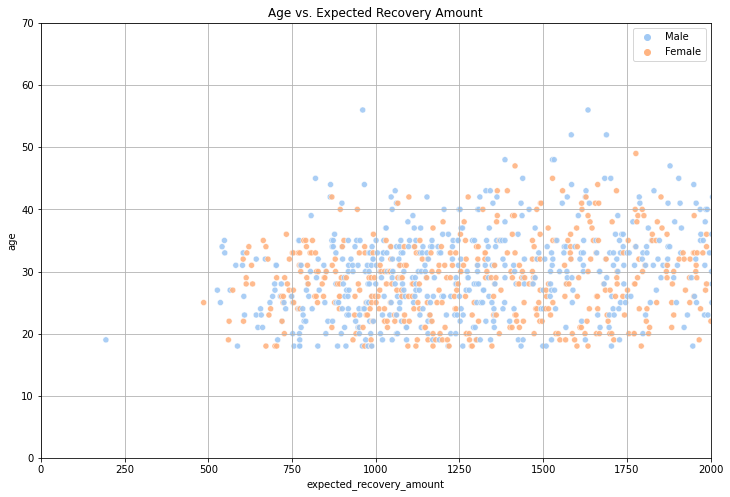

In [24]:
# Age v/s Expected recovery amount
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['expected_recovery_amount'], y = data['age'], data=data, 
                hue = 'sex', palette= 'pastel', alpha = 0.9)
plt.title('Age vs. Expected Recovery Amount')
plt.xlim(0,2000)
plt.ylim(0,70)
plt.legend()
plt.grid(True)
plt.show()

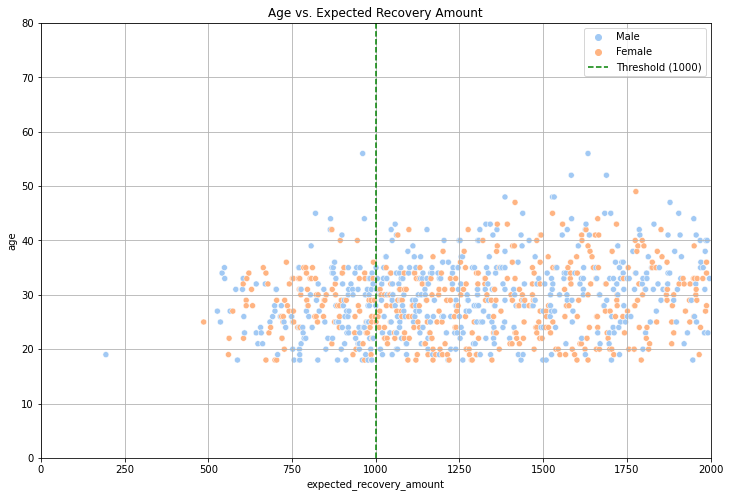

In [25]:
#Expected Recovery Amounts between  0 𝑎𝑛𝑑 2000 where the transition between Levels occurred at  1000
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

plt.figure(figsize=(12,8))
sns.scatterplot(x = filtered_data['expected_recovery_amount'], y = filtered_data['age'], 
                data=data, hue = 'sex', palette= 'pastel')
plt.axvline(x=1000, color='green', linestyle='--', label='Threshold (1000)')
plt.title('Age vs. Expected Recovery Amount')
plt.xlim(0,2000)
plt.ylim(0,80)
plt.legend()
plt.grid(True)
plt.show()

# **Statistical test: age vs. expected recovery amount**

We want to convince ourselves that variables such as age and sex are similar above and below the $1000 Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.

The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around $1000. We will be more confident in our conclusions if we do statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from $900 to $1100.

In [27]:
below_1000 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]
above_1000 = data[(data['expected_recovery_amount'] >= 1000) & (data['expected_recovery_amount'] <= 1100)]

In [31]:
from scipy.stats import ttest_ind
t_statistics, p_value = ttest_ind(below_1000['age'], above_1000['age'])
print('T-Statistics:',t_statistics)
print('P-Value:',p_value)

T-Statistics: -1.6147964445811016
P-Value: 0.10808708027365424


In [41]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


Null hypothesis - There is a significant difference in average age.

Alternate - There is no significant difference in average age.

In [141]:
range_900_1100 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1100)]
grp_by = range_900_1100.groupby(['recovery_strategy'])

level_0 = range_900_1100[range_900_1100['recovery_strategy'] == 'Level 0 Recovery']
level_1 = range_900_1100[range_900_1100['recovery_strategy'] == 'Level 1 Recovery']

t_statistics, p_value = ttest_ind(level_0['age'], level_1['age'])

print('T-Statistics:',t_statistics)
print('P-Value:',p_value)

T-Statistics: -1.6888055955231507
P-Value: 0.09297868115283911


In [40]:
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


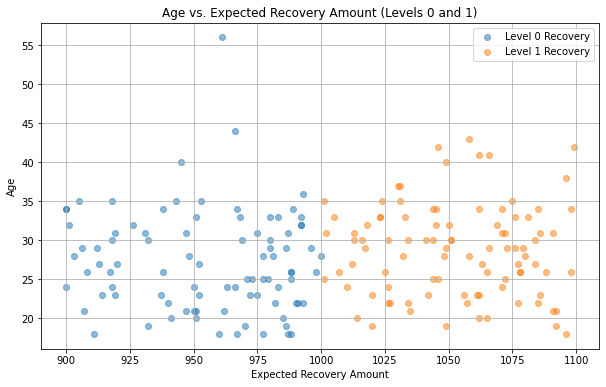

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(level_0['expected_recovery_amount'], level_0['age'], label='Level 0 Recovery', alpha=0.5)
plt.scatter(level_1['expected_recovery_amount'], level_1['age'], label='Level 1 Recovery', alpha=0.5)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount (Levels 0 and 1)')
plt.legend()
plt.grid(True)
plt.show()

# **Statistical test: sex vs. expected recovery amount**
We were able to convince ourselves that there is no major jump in the average customer age just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.

We want to also test that the percentage of customers that are male does not jump as well across the $1000 threshold. We can start by exploring the range of $900 to $1100 and later adjust this range.

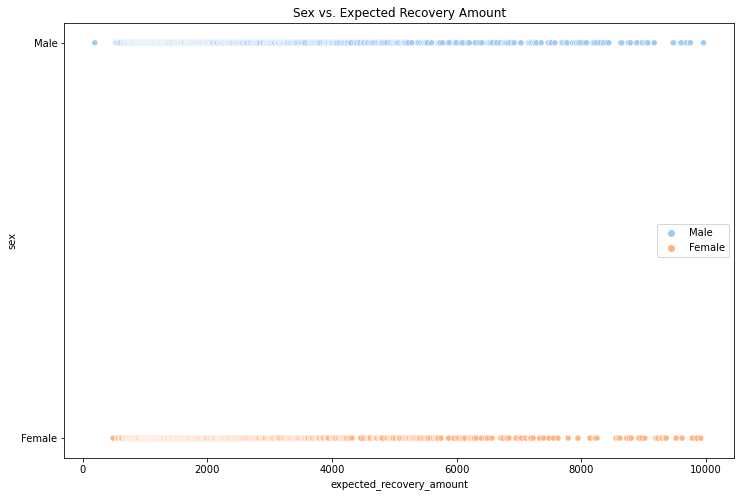

In [45]:
#Statistical test: sex vs. expected recovery amount
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['expected_recovery_amount'], y = data['sex'], data=data, hue = 'sex', palette= 'pastel')
plt.title('Sex vs. Expected Recovery Amount')
plt.legend()
plt.show()

In [65]:
from scipy.stats import chi2_contingency
'''below_1000 = data[data['expected_recovery_amount'] < 1000]                #threshold = 1000
above_1000 = data[data['expected_recovery_amount'] >= 1000] '''                

# Number of customers in each category
conti_table = pd.crosstab(data[(data['expected_recovery_amount']<1100) & (data['expected_recovery_amount']>=900)]['recovery_strategy'], 
                       data['sex'])
print(conti_table)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


In [71]:
chi2, p, _, _ = chi2_contingency(conti_table)
print('Chi-Squared Stats:',chi2)
print('P-Value:',p)

Chi-Squared Stats: 0.3796422112341753
P-Value: 0.5377947810444592


**Common Significance Level = 0.05(5%)**

Since the P-value is 0.53 is greater than 0.05, there is no enough evidence to reject null hypothesis. 

Hence, there is no significant association between the sex of customers and expected recovery amt.

In [72]:
from scipy.stats import chi2_contingency

data['threshold'] = data['expected_recovery_amount'] > 1000
conti_table = pd.crosstab(data['sex'], data['threshold'])
chi2, p, _, _ = chi2_contingency(conti_table)

In [73]:
conti_table                           #expected recovery amt > 100 = True & expected recovery amt < 1000 = false

threshold,False,True
sex,,
Female,108,801
Male,139,834


In [74]:
print('Chi-Squared Stats:',chi2)
print('P-Value:',p)

Chi-Squared Stats: 2.1768676619404688
P-Value: 0.14009934427173568


**Common Significance Level = 0.05(5%)**

Since the P-value is 0.14 is greater than 0.05, there is no enough evidence to reject null hypothesis. 

Hence, there is no significant association between the sex of customers and expected recovery amt of 1000 threshold

In [76]:
range_900_1100.shape

(183, 6)

# **Exploratory graphical analysis: recovery amount**
We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in terms of their average age and the percentage that are male.

It is now time to focus on the key outcome of interest, the actual recovery amount.

A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

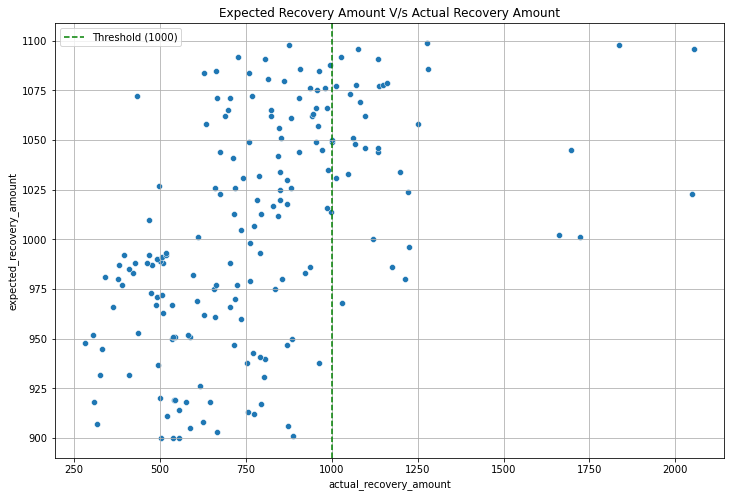

In [86]:
#expected recovery amount v/s actual recovery amount
plt.figure(figsize=(12,8))
sns.scatterplot(x = range_900_1100['actual_recovery_amount'], y = range_900_1100['expected_recovery_amount'], 
                data=range_900_1100, palette= 'pastel')
plt.axvline(x=1000, color='g', linestyle='--', label='Threshold (1000)')
plt.title('Expected Recovery Amount V/s Actual Recovery Amount')
plt.legend()
plt.grid(True)
plt.show()

# **Statistical analysis: recovery amount**
Just as we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above $1000  threshold. 

we are going to do this for two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.

Again, the statistical test we will use is the Kruskal-Wallis test, a test that makes no assumptions about the distribution of the actual recovery amount.

In [173]:
from scipy import stats

range_950_1050 = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] < 1050)]

result_1 = stats.kruskal(range_900_1100[range_900_1100['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount'], 
                        range_900_1100[range_900_1100['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount'])
                         
result_2 = stats.kruskal(range_950_1050[range_950_1050['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount'], 
                        range_950_1050[range_950_1050['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount'])
                         

In [100]:
print(result_1)

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)


In [101]:
print(result_2)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


Hence, in both cases pvalues are very small it means close to zero which indicates strong evidence against null hypothesis.

We can conclude that there is significant difference in the distribution of actual recovery amounts between two recovery strategy groups.

# **Regression Modeling - no threshold**

We now want to take a regression-based approach to estimate the impact of the program at the $1000 threshold using the data that is just above and just below the threshold. In order to do that, we will build two models. The first model does not have a threshold while the second model will include a threshold.

The first model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [117]:
from sklearn.linear_model import LinearRegression

threshold = 1000
data_near_1000 = data[(data['expected_recovery_amount'] >= threshold - 70) & 
                      (data['expected_recovery_amount'] < threshold + 70)]  #threshold = 1000

In [118]:
x = data_near_1000[['expected_recovery_amount']]
y = data_near_1000['actual_recovery_amount']

In [119]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [121]:
prediction = regressor.predict(x)

In [130]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y, prediction)
rmse = np.sqrt(mae)
print('Mean Absolute error:',mae)
print('RMSE:',rmse)

Mean Absolute error: 188.89179006860437
RMSE: 13.74379096423561


In [132]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, prediction)
print('R-Squared:',r_squared)

R-Squared: 0.217793689590419


In [137]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor= RandomForestRegressor()
rf_regressor.fit(x, y)

RandomForestRegressor()

In [136]:
prediction = rf_regressor.predict(x)

In [134]:
mae = metrics.mean_absolute_error(y, prediction)
rmse = np.sqrt(mae)
print('Mean Absolute error:',mae)
print('RMSE:',rmse)

Mean Absolute error: 112.73314132341307
RMSE: 10.617586417044745


In [135]:
r_squared = r2_score(y, prediction)
print('R-Squared:',r_squared)

R-Squared: 0.6689368901381412


In [143]:
range_900_1100.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex', 'threshold'],
      dtype='object')

In [146]:
x = range_900_1100[['expected_recovery_amount']]
y = range_900_1100['actual_recovery_amount']

In [147]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [148]:
prediction = regressor.predict(x)

In [149]:
mae = metrics.mean_absolute_error(y, prediction)
rmse = np.sqrt(mae)
print('Mean Absolute error:',mae)
print('RMSE:',rmse)

Mean Absolute error: 186.96629988480248
RMSE: 13.673562077410644


In [150]:
r_squared = r2_score(y, prediction)
print('R-Squared:',r_squared)

R-Squared: 0.26055416614656146


# **Regression modeling: adding true threshold**

From the first model, we see that the regression coefficient is statistically significant for the expected recovery amount and the adjusted R-squared value was about 0.26. As we saw from the graph, on average the actual recovery amount increases as the expected recovery amount increases. We could add polynomial terms of expected recovery amount (such as the squared value of expected recovery amount) to the model but, for the purposes of this practice, let's stick with using just the linear term.

The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [174]:
data['indicater'] = np.where(data['expected_recovery_amount'] < 1000, 0, 1)

In [167]:
x = range_900_1100[['expected_recovery_amount','indicater']]
y = range_900_1100['actual_recovery_amount']

In [168]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [169]:
prediction = regressor.predict(x)

In [170]:
mae = metrics.mean_absolute_error(y, prediction)
rmse = np.sqrt(mae)
print('Mean Absolute error:',mae)
print('RMSE:',rmse)

Mean Absolute error: 182.63976429585023
RMSE: 13.514428004760328


In [171]:
r_squared = r2_score(y, prediction)
print('R-Squared:',r_squared)

R-Squared: 0.3141270744516168


# **Regression modeling: adjusting the window**

The regression coefficient for the true threshold was statistically significant with an estimated impact of around $278 and a 95 percent confidence interval of $132 to $424. This is much larger than the incremental cost of running the higher recovery strategy which was $50 per customer. At this point, we are feeling reasonably confident that the higher recovery strategy is worth the additional costs of the program for customers just above and just below the threshold.

Before showing this to our managers, we want to convince ourselves that this result wasn't due just to us choosing a window of $900 to $1100 for the expected recovery amount. If the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we choose a slightly bigger or a slightly smaller window for the expected recovery amount. Let's repeat this analysis for the window of expected recovery amount from $950 to $1050 to see if we get similar results.

In [175]:
x = range_950_1050[['expected_recovery_amount','indicater']]
y = range_950_1050['actual_recovery_amount']

In [176]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [177]:
prediction = regressor.predict(x)

In [178]:
mae = metrics.mean_absolute_error(y, prediction)
rmse = np.sqrt(mae)
print('Mean Absolute error:',mae)
print('RMSE:',rmse)

Mean Absolute error: 193.56568825775798
RMSE: 13.91278865856008


In [179]:
r_squared = r2_score(y, prediction)
print('R-Squared:',r_squared)

R-Squared: 0.2834733924219919
